<a href="https://colab.research.google.com/github/Joypamelakariuki/Joypamelakariuki/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2022_03_Joy_Kariuki_DataReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Bivariate Analysis

## 1. Defining the Question

In order to understand the state of financial inclusion in a country, it is important to understand the rate and level of individuals who have access to commercial banking. This is one of the determinants as it determines the savings rate, bank growth and financial freedem. Predicting which individuals are likely to ave or use a back account in order to understand the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda is one of the ways that can be done. This is by analysing data provided to understand the insights.

### a) Specifying the Data Analytic Question


Determining which individuals are likely to ave or use a back account in order to understand the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda

### b) Defining the Metric for Success

Finding the situations and factors where people are likely to have bank accounts. Understanding this by looking at the different countries, Kenya, Rwanda, Tanzania and Uganda.

### c) Understanding the context 

### d) Recording the Experimental Design

By cleaning and tidying up the data and having the right packages, it is easy to do the univariate, bivariate and Multivariate analysis  on data and draw conclusions. At the end of the study, the bank account ownership is determined for the different variables to determine which ones have the most number of bank accounts.

### e) Data Relevance

This data is from a relevance source, FinScope Africa, FinScope is a nationally representative survey that provides an overview of the different economic drivers.

## 2. Reading the Data

In [1236]:
##Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [1237]:
##Loading the data variables to view the columns
dataview = pd.read_csv("http://bit.ly/VariableDefinitions ")
dataview

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [1238]:
##Loading the east africa dataset
#http://bit.ly/FinancialDataset 
EastAfrica_dataset= pd.read_csv("http://bit.ly/FinancialDataset")
EastAfrica_dataset

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [1239]:
EastAfrica_dataset

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [1240]:
# Determining the no. of records in our dataset
EastAfrica_dataset.shape

(23524, 13)

In [1241]:
# Previewing the top of our dataset
EastAfrica_dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [1242]:
# Previewing the bottom of our dataset
EastAfrica_dataset.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [1243]:
# Checking whether each column has an appropriate datatype
EastAfrica_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [1244]:
#Changing column names
EastAfrica_dataset.rename(columns = {"Has a Bank account":"Has_a_Bank_account", "Type of Location":"Type_of_Location", "Cell Phone Access":"Cell_Phone_Access", "Respondent Age":"Respondent_Age", "The relathip with head":"Relationship_with_head", "Level of Educuation":"Level_of_Educuation", "Type of Job":"Type_of_Job"}, inplace = True)
EastAfrica_dataset.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'Relationship_with_head', 'marital_status',
       'Level_of_Educuation', 'Type_of_Job'],
      dtype='object')

In [1245]:
EastAfrica_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has_a_Bank_account      23488 non-null  object 
 4   Type_of_Location        23509 non-null  object 
 5   Cell_Phone_Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent_Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   Relationship_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level_of_Educuation     23495 non-null  object 
 12  Type_of_Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


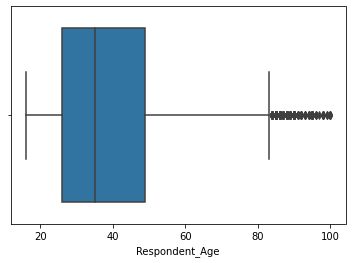

In [1246]:
# Checking for Outliers
#This will only work for data with float values or int.
sns.boxplot(EastAfrica_dataset["Respondent_Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


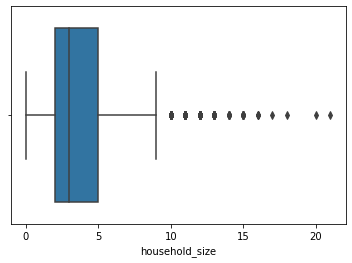

In [1247]:
sns.boxplot(EastAfrica_dataset["household_size"])

In [1248]:
# Checking for Anomalies
#For the EastAfrica_dataset
EastAfrica_dataset.describe()

,year,household_size,Respondent_Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [1249]:
# Checking for Anomalies
#For the EastAfrica_dataset
quant_house_1 = EastAfrica_dataset['household_size'].quantile(.25)
quant_house_2 = EastAfrica_dataset['household_size'].quantile(.75)

difference_household = quant_house_2 - quant_house_1
print(difference_household )

3.0


In [1250]:
# Identifying the Missing Data
#
EastAfrica_dataset.isnull().any()

country                    True
year                      False
uniqueid                  False
Has_a_Bank_account         True
Type_of_Location           True
Cell_Phone_Access          True
household_size             True
Respondent_Age             True
gender_of_respondent       True
Relationship_with_head     True
marital_status             True
Level_of_Educuation        True
Type_of_Job                True
dtype: bool

In [1251]:
# Dealing with the Missing Data
EastAfrica_dataset.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has_a_Bank_account        36
Type_of_Location          15
Cell_Phone_Access         11
household_size            28
Respondent_Age            34
gender_of_respondent      34
Relationship_with_head     4
marital_status            32
Level_of_Educuation       29
Type_of_Job               30
dtype: int64

This shows that there is presence of many missing data , which could be the course of the outliers. 

In [1252]:
#Dropping duplicates
EastAfrica_dataset.drop_duplicates()


,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [1253]:
##Solving the missing values
#
EastAfrica_dataset_clean = EastAfrica_dataset.dropna(axis=0)
EastAfrica_dataset_clean

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Since the content if deleted won't affect the output too much, I have chosen to drop the rows with missing data.
The number of rows are still many and enough.

In [1254]:
EastAfrica_dataset_clean.shape

(23343, 13)

In [1255]:
EastAfrica_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has_a_Bank_account      23343 non-null  object 
 4   Type_of_Location        23343 non-null  object 
 5   Cell_Phone_Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent_Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   Relationship_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level_of_Educuation     23343 non-null  object 
 12  Type_of_Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [1256]:
EastAfrica_dataset_clean.isnull().any()

country                   False
year                      False
uniqueid                  False
Has_a_Bank_account        False
Type_of_Location          False
Cell_Phone_Access         False
household_size            False
Respondent_Age            False
gender_of_respondent      False
Relationship_with_head    False
marital_status            False
Level_of_Educuation       False
Type_of_Job               False
dtype: bool

In [1257]:
EastAfrica_dataset_clean.shape

(23343, 13)

There is no missing data 

In [1258]:
EastAfrica_dataset_clean["Type_of_Location"].unique()


array(['Rural', 'Urban'], dtype=object)

In [1259]:
EastAfrica_dataset_clean["country"].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [1260]:
EastAfrica_dataset_clean["gender_of_respondent"].unique()

array(['Female', 'Male'], dtype=object)

In [1261]:
EastAfrica_dataset_clean["Cell_Phone_Access"].unique()

array(['Yes', 'No'], dtype=object)

In [1262]:
EastAfrica_dataset_clean["gender_of_respondent"].unique()

array(['Female', 'Male'], dtype=object)

In [1263]:
EastAfrica_dataset_clean["Relationship_with_head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [1264]:
EastAfrica_dataset_clean["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [1265]:
EastAfrica_dataset_clean["Level_of_Educuation"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [1266]:
EastAfrica_dataset_clean["Type_of_Job"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [1267]:
#Dropping uniqueid column
EastAfrica_dataset_clean_new = EastAfrica_dataset_clean.drop(['uniqueid'], axis=1)

In [1268]:
#Viewing the data again
EastAfrica_dataset_clean_new.head(5)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [1269]:
EastAfrica_dataset_clean_new.tail(5)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## 6. Exploratory Analysis

##UNIVARIATE ANALYSIS


## 1. Categorical variables

**Analysing the countries being studied**

In [1270]:
#The number of countries in the study and totals for each
countries = EastAfrica_dataset_clean_new.country.value_counts()
countries

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

We are studying 8,684 people from Rwanda, 6500 from Tanzania, 6064 from Kenyaand 2095 from Uganda.

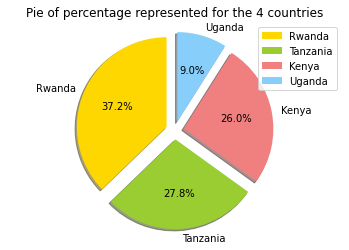

In [1271]:
explode = (0.1, 0.1, 0.1, 0.1)
region = ['Rwanda', 'Tanzania', 'Kenya', 'Uganda']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(countries, explode=explode, labels=region, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Pie of percentage represented for the 4 countries')
plt.legend()
plt.show()

#plt.pie(plot1)

From the pie chart, it can be seen that the largest percentage of the data is from Rwanda, followed by Tanzania, then Kenya and finally Uganda

**People with or without bank accounts**

In [1272]:
banks = EastAfrica_dataset_clean_new.Has_a_Bank_account.value_counts()
banks

No     20046
Yes     3297
Name: Has_a_Bank_account, dtype: int64

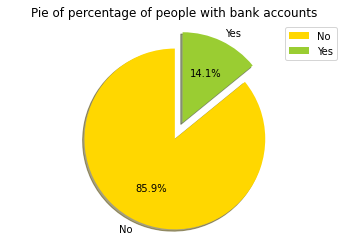

In [1273]:
#Checking the percentage of people with bank accounts in the dataset
banks = EastAfrica_dataset_clean_new.Has_a_Bank_account.value_counts()

explode = (0.1, 0.1)
response = ['No', 'Yes']
colors = ['gold', 'yellowgreen']

plt.pie(banks, explode=explode, labels=response, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Pie of percentage of people with bank accounts')
plt.legend()
plt.show()

#plt.pie(plot1)

In the study, 20,046 people don'h have bank accounts which represents 85.9%
 while 3297 people which represents 14.1% have bank accounts.

**Data for the different countries**





In [1274]:
Rwanda_dataset = EastAfrica_dataset_clean_new[EastAfrica_dataset_clean_new.country == 'Rwanda']
#Rwanda_dataset

In [1275]:
Tanzania_dataset = EastAfrica_dataset_clean_new[EastAfrica_dataset_clean_new.country == 'Tanzania']
#Tanzania_dataset

In [1276]:
Kenya_dataset = EastAfrica_dataset_clean_new[EastAfrica_dataset_clean_new.country == 'Kenya']
#Kenya_dataset

In [1277]:
Uganda_dataset = EastAfrica_dataset_clean_new[EastAfrica_dataset_clean_new.country == 'Uganda']
#Uganda_dataset

In [1278]:
##Summary for those with access to the bank or have bank accounts per country
bank_country = EastAfrica_dataset_clean_new.Has_a_Bank_account.groupby(EastAfrica_dataset_clean_new.country).value_counts()
bank_country

country   Has_a_Bank_account
Kenya     No                    4544
          Yes                   1520
Rwanda    No                    7687
          Yes                    997
Tanzania  No                    5901
          Yes                    599
Uganda    No                    1914
          Yes                    181
Name: Has_a_Bank_account, dtype: int64

In [1279]:
#Checking the bank accounts per country
banks_Rwanda = Rwanda_dataset.Has_a_Bank_account.value_counts()
banks_Tanzania = Tanzania_dataset.Has_a_Bank_account.value_counts()
banks_Kenya = Kenya_dataset.Has_a_Bank_account.value_counts()
banks_Uganda = Uganda_dataset.Has_a_Bank_account.value_counts()


In [1280]:
explode = (0.1, 0.1)
response = ['No', 'Yes']
colors1 = ['gold', 'yellowgreen']
colors2 = ['blue', 'yellowgreen']
colors3 = ['green', 'yellowgreen']
colors4 = ['lightcoral', 'yellowgreen']

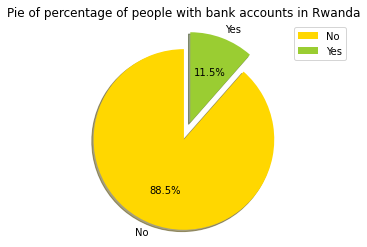

In [1281]:
plt.pie(banks_Rwanda, explode=explode, labels=response, colors=colors1,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Pie of percentage of people with bank accounts in Rwanda')
plt.legend()
plt.show()

Only 11.5% of people in Rwanda have bank accounts.

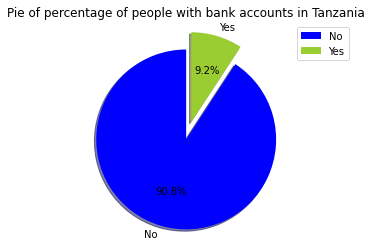

In [1282]:
plt.pie(banks_Tanzania, explode=explode, labels=response, colors=colors2,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Pie of percentage of people with bank accounts in Tanzania')
plt.legend()
plt.show()

Only 9.2% of people in Tanzania have bank accounts

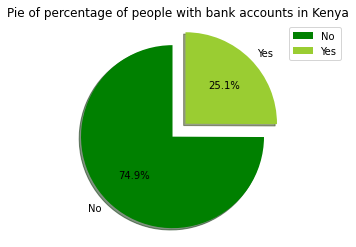

In [1283]:
plt.pie(banks_Kenya, explode=explode, labels=response, colors=colors3,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Pie of percentage of people with bank accounts in Kenya')
plt.legend()
plt.show()

25.1% of people in Kenya have a bank account

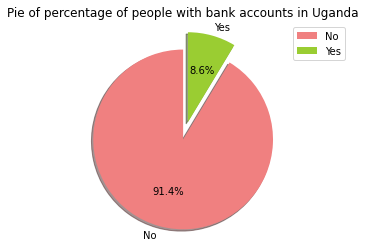

In [1284]:
plt.pie(banks_Uganda, explode=explode, labels=response, colors=colors4,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Pie of percentage of people with bank accounts in Uganda')
plt.legend()
plt.show()

8.6% of people in Uganda have access or have a bank account.
Kenya is leading, followed by Rwanda, then Tanzania and Uganda being the last with people who have access to the bank or have ank accounts.

In [1285]:
#fig, axs = plt.subplots(2, 2)
#plt.title("Rwanda")
#axs[0, 0].pie(banks_Rwanda, explode=explode, labels=response, colors=colors1,
#autopct='%1.1f%%', shadow=True, startangle=90)


#axs[0, 1].pie(banks_Tanzania, explode=explode, labels=response, colors=colors2,
#autopct='%1.1f%%', shadow=True, startangle=90)

#axs[1,0].pie(banks_Kenya, explode=explode, labels=response, colors=colors3,
#autopct='%1.1f%%', shadow=True, startangle=90)

#axs[1,1].pie(banks_Uganda, explode=explode, labels=response, colors=colors4,
#autopct='%1.1f%%', shadow=True, startangle=90)

**Location of the respondents**

In [1286]:
Location = EastAfrica_dataset_clean_new.Type_of_Location.value_counts()
Location

Rural    14264
Urban     9079
Name: Type_of_Location, dtype: int64

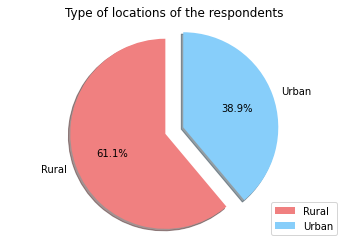

In [1287]:
colors5 = ['lightcoral', 'lightskyblue']
area = ['Rural','Urban']
plt.pie(Location, explode=explode, labels=area, colors=colors5,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Type of locations of the respondents')
plt.legend()
plt.show()

14264 respondents are from the rural areas which represents 61.1% while 9079 are from the urban areas which accounts for 38.9% of the total responses.

**Cell phone access**

In [1288]:
cellphone = EastAfrica_dataset_clean_new.Cell_Phone_Access.value_counts()
cellphone



Yes    17334
No      6009
Name: Cell_Phone_Access, dtype: int64

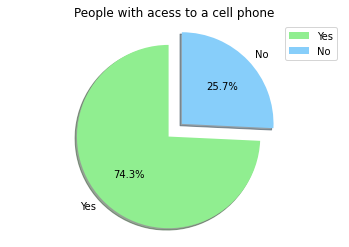

In [1289]:
colors6 = ['lightgreen', 'lightskyblue']
cell = ['Yes','No']
plt.pie(cellphone, explode=explode, labels=cell, colors=colors6,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('People with acess to a cell phone')
plt.legend()
plt.show()

It can be seen that majority of the people 74.3% have access to a cell phone across the regions while only 25.7% do not have the access.

**Gender of the respondents**

In [1290]:
Gender = EastAfrica_dataset_clean_new.gender_of_respondent.value_counts()
Gender

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64

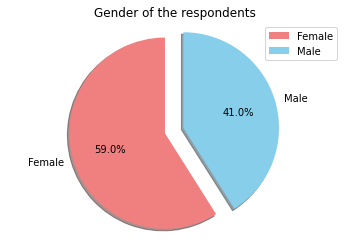

In [1291]:
colors7 = ['lightcoral', 'skyblue']
sex= ['Female','Male']
plt.pie(Gender, explode=explode, labels=sex, colors=colors7,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Gender of the respondents')
plt.legend()
plt.show()

It can be seen that majority of the respondents were females accounting for 59% while male accounted for 41% of the population.

**Relationship with the head**

In [1292]:
relationship_head = EastAfrica_dataset_clean_new.Relationship_with_head.value_counts()
relationship_head

Head of Household      12730
Spouse                  6471
Child                   2221
Parent                  1069
Other relative           663
Other non-relatives      189
Name: Relationship_with_head, dtype: int64

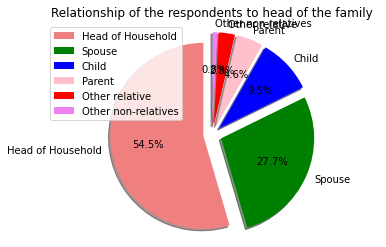

In [1293]:
colors8 = ['lightcoral', 'green','blue', 'pink', 'red','violet']
explode1 = (0.1, 0.1, 0.1, 0.1,0.1, 0.1)
rship= ['Head of Household','Spouse', 'Child','Parent','Other relative', 'Other non-relatives']
plt.pie(relationship_head, explode=explode1, labels=rship, colors=colors8,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Relationship of the respondents to head of the family')
plt.legend()
plt.show()

Majority of the respondents were the household heads followed by the spouce, then the children accounting for 54.5%, 27.7%, 9.5% respectively.

**Marital status**

In [1294]:
marital_status = EastAfrica_dataset_clean_new.marital_status.value_counts()
marital_status

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

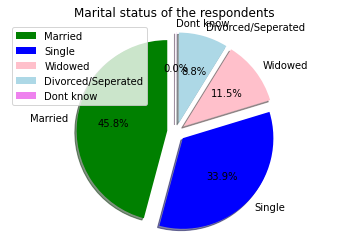

In [1295]:
colors9 = ['green','blue', 'pink', 'lightblue','violet']
explode2 = (0.1, 0.1, 0.1, 0.1,0.1)
rship= ['Married','Single', 'Widowed','Divorced/Seperated','Dont know']
plt.pie(marital_status, explode=explode2, labels=rship, colors=colors9,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Marital status of the respondents')
plt.legend()
plt.show()

Majority of the respondents were married followed by those that were single then widowed. Those that were divorced or separated followed and the least being those that didn't know.

**Level of Education**

In [1296]:
education = EastAfrica_dataset_clean_new.Level_of_Educuation.value_counts()
education

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level_of_Educuation, dtype: int64

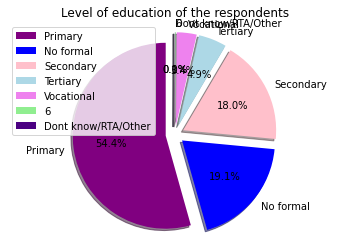

In [1297]:
colors9 = ['purple','blue', 'pink', 'lightblue','violet','lightgreen', 'indigo']
explode2 = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1)
rship= ['Primary','No formal', 'Secondary','Tertiary','Vocational','6', 'Dont know/RTA/Other']
plt.pie(education, explode=explode2, labels=rship, colors=colors9,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('Level of education of the respondents')
plt.legend()
plt.show()

Majority of the respondents have completed primary school with the least being the retired and those that don't know their levels.

**Type of job**

In [1298]:
job = EastAfrica_dataset_clean_new.Type_of_Job.value_counts()
job

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: Type_of_Job, dtype: int64

## Numerical variables

Measures of central tendancy

**Household size for the respondents**

In [1299]:
household = EastAfrica_dataset_clean_new['household_size']


In [1300]:
#Mean
household.mean()

3.6886432763569377

An average respondents family, has approximately 4 members.

In [1301]:
#Mode
household.mode()

0    2.0
dtype: float64

Most of the respondents have a family size of 2 members

In [1302]:
#Median
household.median()

3.0

The middle family size in the in the data has 3 members

###  Measures of Dispersion/Variability/Spread


In [1303]:
#Standard Deviation
household.std()

2.2811835250351495

From the standard deviation obtained, we conclude that most of the family sizes, varied from the mean with 2 members.

In [1304]:
#Variance
household.var()

5.20379827489179

The household sizes do not vary very much amongst each other.

In [1305]:
#Range
max_house = household.max()
min_house = household.min()
print(max_house, min_house)


21.0 0.0


In [1306]:
range =  max_house - min_house
range

21.0

The largest household has a size of 21 members wile the least is 0.

In [1307]:
#Quartiles
household.quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

25% of the households have a size of 2 members each. 50% of the population have a size of 3 members while 75% of the households, have 5 members each.

In [1308]:
#Skewness
household.skew()

0.9741086837897069

The distribution of the household is positively skewed. Meaning that most of the household size data lies on the right tail.

In [1309]:
#Kurtosis
household.kurt()

1.1538690689335573

Then the household size distribution has heavier tails and is called a leptokurtic distribution. Presence of outliers is caused by the different amount of sizes of the households.

In [1310]:
household.describe()

count    23343.000000
mean         3.688643
std          2.281184
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

That provides a summary of the household size in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


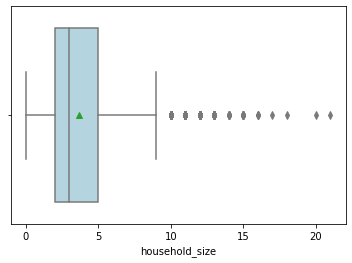

In [1311]:
sns.boxplot(household, showmeans=True, color='lightblue')

To justify the data above, some families are polygamous and as such have large sizes of their household members. While others have very few members.

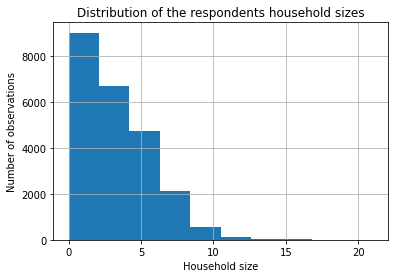

In [1312]:
household.hist()
plt.title("Distribution of the respondents household sizes")
plt.xlabel("Household size")
plt.ylabel("Number of observations")
plt.show()


The histogram shows a summary of the number of observations for every size of a household.

 **Respondent age**

In [1313]:
age = EastAfrica_dataset_clean_new['Respondent_Age']



In [1314]:
#mean
age.mean()

38.80550914621085

The averae age of the respondents in this study is 38.8 years

In [1315]:
#mode
age.mode()

0    30.0
dtype: float64

Respondents of age 30 years were the majority

In [1316]:
#median
age.median()

35.0

The middle age in the dataset of the respodents is 35 years.

In [1317]:
#Standard deviation
age.std()

16.51980349804178

The respondents age vary with 16 years from the mean.

In [1318]:
#variance
age.var()

272.90390761391353

The respondents age vary so much amongst each other.

In [1319]:
#Skewness
age.skew()

0.840661747532081

The age of the respondents is also positively skewed, meaning that most of them lies on the right tail.

In [1320]:
#Kurtosis
age.kurt()

0.09844652254807196

The age of the respondents has heavier tails and is called a leptokurtic distribution. This is because the survey targeted people of different ages.

In [1321]:
#The range of the age
max_age = age.max()
min_age = age.min()
print(max_age, min_age)

100.0 16.0


The range of the age that was considered during the study was a minimum of 16 years and a maximum of 100 years.

In [1322]:
#Range
age_range = max_age - min_age
age_range 

84.0

The difference between the oldest and the youngest respondent was 84 years.

In [1323]:
#Skewness
household.skew()

0.9741086837897069

The age data is positively skewed.

In [1324]:
#Kurtosis
age.kurt()

0.09844652254807196

Since the kurtosis is very close to 0, it shows that age assumes a normal distribution.

In [1325]:
age.describe()

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

This shows a summary of the age in the database as already discussed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


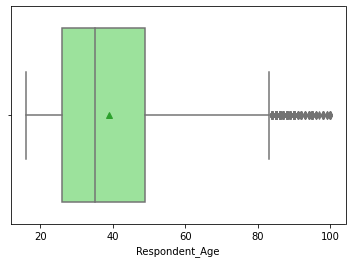

In [1326]:
sns.boxplot(age, showmeans=True, color='lightgreen')

The boxplot shows an accumulation of agesets that are being considered as outliers. In this study, we will still consider the age since they have all been considered in the range.

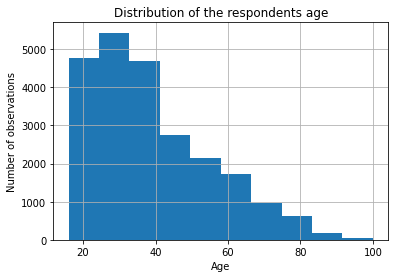

In [1327]:
age.hist()
plt.title("Distribution of the respondents age")
plt.xlabel("Age")
plt.ylabel("Number of observations")
plt.show()

The histogram shows a summary of the number of observations for every age of the respondents.

In this study, the univariate analysis worked well, and showed the different variables in the study as well as the differences in the countries. At the end, we will be able to understand the different variables and how they influence one having a bank account.

##BIVARIATE ANALYSIS


Numerical and Numerical

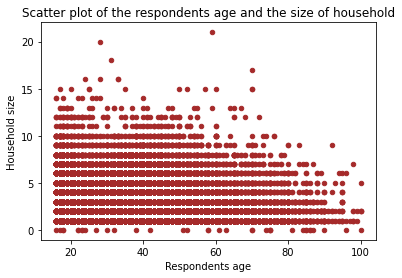

In [1328]:
#Plotting a scatter plot between household size and age
EastAfrica_dataset_clean_new.plot(x = 'Respondent_Age', y = 'household_size', kind='scatter', color = "brown")
plt.title("Scatter plot of the respondents age and the size of household")
plt.xlabel("Respondents age")
plt.ylabel("Household size")
plt.show()

The scatter plot above shows data that is scattered allover with no specific pattern. It does not show any linear relationship between respondents age and the household size.

In [1329]:
#Pearsons correlation coefficient
np.corrcoef(EastAfrica_dataset_clean_new.Respondent_Age, EastAfrica_dataset_clean_new.household_size)

array([[ 1.       , -0.1197092],
       [-0.1197092,  1.       ]])

This indicates a weak negative correlation between the respondents age and the household size. 

In [1330]:
#t-test of te two independent variables
t_statistic, p_value = ttest_ind(EastAfrica_dataset_clean_new.Respondent_Age, EastAfrica_dataset_clean_new.household_size)
t_statistic, p_value

(321.7270468155308, 0.0)

The t test shows that there is a very huge difference between respondent age and the size of the household. They are not each others determinants.

For the sake of this study, the bivariate analysis between categorical variables was not that effective, this is because they are very categorical and difficult to quantify. Further analysis though, will try to show the types of factors that respondents have to determine if at all they have the bank accounts.

##MULTIVARIATE ANALYSIS




We will start by first viewing the distribution of data of the entire dataset.

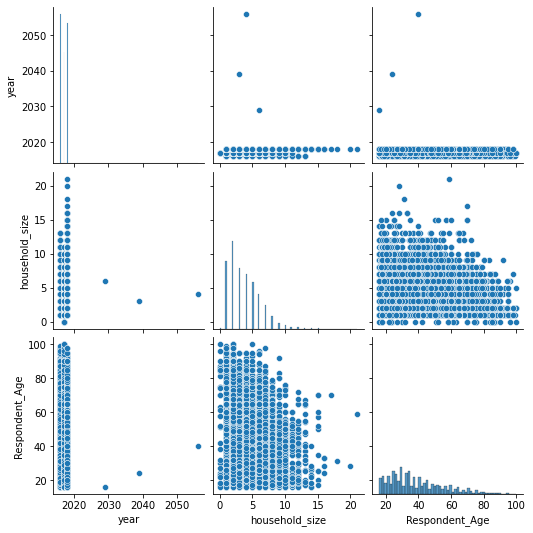

In [1331]:
# Ploting the bivariate summaries and recording our observations.
sns.pairplot(EastAfrica_dataset_clean_new)
plt.show()

The output shows the distribution of the year, household size and respondent age amongst each other.

The next step is to check the correlation of the entire dataset, to see how the different variables/columns relate with each other.

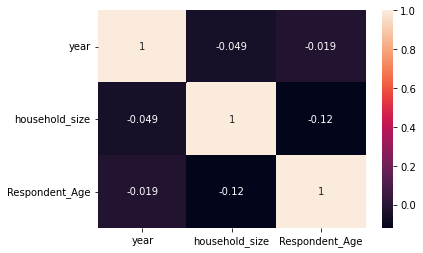

In [1332]:
#Correlation table
sns.heatmap(EastAfrica_dataset_clean_new.corr(),annot=True)
plt.show()

From the correlation table, household size has a negative very weak correlation with year. The respondent age too, has a negative and very weak correlation with year, which is almost tending to zero. There also a negative weak correlation between the respondents age and the household size.

Principal Component Analysis

In [1333]:
#Removing one column that I prefer not to use
EastAfrica_dataset_clean_new_without = EastAfrica_dataset_clean_new.drop("Relationship_with_head", 1)
EastAfrica_dataset_clean_new_without.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [1334]:
#Dropping the year column
EastAfrica_dataset_clean_new_without_year = EastAfrica_dataset_clean_new_without.drop("year", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [1335]:
#Giving the categorical values, int numbers
country_name = {'country':{'Rwanda': 1, 'Tanzania':2, 'Kenya':3, 'Uganda':4}}
EastAfrica_dataset_clean_new_without_year.replace(country_name, inplace=True)
EastAfrica_dataset_clean_new_without_year['country']=EastAfrica_dataset_clean_new_without_year['country'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,3,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,3,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,3,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,3,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [1336]:
bank_detail = {'Has_a_Bank_account':{'Yes': 1, 'No':0}}
EastAfrica_dataset_clean_new_without_year.replace(bank_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['Has_a_Bank_account']=EastAfrica_dataset_clean_new_without_year['Has_a_Bank_account'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,3,0,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,3,1,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,3,0,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,3,0,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [1337]:
location_detail = {'Type_of_Location':{'Rural': 1, 'Urban':0}}
EastAfrica_dataset_clean_new_without_year.replace(location_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['Type_of_Location']=EastAfrica_dataset_clean_new_without_year['Type_of_Location'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,1,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,3,0,1,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,3,1,0,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,3,0,1,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,3,0,0,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [1338]:
cellphone_detail = {'Cell_Phone_Access':{'Yes': 1, 'No':0}}
EastAfrica_dataset_clean_new_without_year.replace(cellphone_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['Cell_Phone_Access']=EastAfrica_dataset_clean_new_without_year['Cell_Phone_Access'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,1,1,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,3,0,1,0,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,3,1,0,1,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,3,0,1,1,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,3,0,0,0,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [1339]:
gender_detail = {'gender_of_respondent':{'Female': 1, 'Male':0}}
EastAfrica_dataset_clean_new_without_year.replace(gender_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['gender_of_respondent']=EastAfrica_dataset_clean_new_without_year['gender_of_respondent'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,1,1,3.0,24.0,1,Married/Living together,Secondary education,Self employed
1,3,0,1,0,5.0,70.0,1,Widowed,No formal education,Government Dependent
2,3,1,0,1,5.0,26.0,0,Single/Never Married,Vocational/Specialised training,Self employed
3,3,0,1,1,5.0,34.0,1,Married/Living together,Primary education,Formally employed Private
4,3,0,0,0,8.0,26.0,0,Single/Never Married,Primary education,Informally employed


In [1340]:
marital_detail = {'marital_status':{'Married/Living together': 1, 'Single/Never Married':2, 'Widowed':3, 'Divorced/Seperated':4, 'Dont know':5}}
EastAfrica_dataset_clean_new_without_year.replace(marital_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['marital_status']=EastAfrica_dataset_clean_new_without_year['marital_status'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,1,1,3.0,24.0,1,1,Secondary education,Self employed
1,3,0,1,0,5.0,70.0,1,3,No formal education,Government Dependent
2,3,1,0,1,5.0,26.0,0,2,Vocational/Specialised training,Self employed
3,3,0,1,1,5.0,34.0,1,1,Primary education,Formally employed Private
4,3,0,0,0,8.0,26.0,0,2,Primary education,Informally employed


In [1341]:
Educuation_detail = {'Level_of_Educuation':{'Tertiary education': 1, 'Vocational/Specialised training':2, 'Secondary education':3, 'Primary education':4, 'No formal education':5, 'Other/Dont know/RTA':6}}
EastAfrica_dataset_clean_new_without_year.replace(Educuation_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['Level_of_Educuation']=EastAfrica_dataset_clean_new_without_year['Level_of_Educuation'].astype('int')
EastAfrica_dataset_clean_new_without_year.head(10)

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,1,1,3.0,24.0,1,1,3,Self employed
1,3,0,1,0,5.0,70.0,1,3,5,Government Dependent
2,3,1,0,1,5.0,26.0,0,2,2,Self employed
3,3,0,1,1,5.0,34.0,1,1,4,Formally employed Private
4,3,0,0,0,8.0,26.0,0,2,4,Informally employed
5,3,0,1,0,7.0,26.0,1,1,4,Informally employed
6,3,0,1,1,7.0,32.0,1,1,4,Self employed
7,3,0,1,1,1.0,42.0,1,1,1,Formally employed Government
8,3,1,1,1,3.0,54.0,0,1,3,Farming and Fishing
9,3,0,0,1,3.0,76.0,1,4,5,Remittance Dependent


In [1342]:
Job_detail = {'Type_of_Job':{'Self employed': 1, 'Government Dependent':2, 'Formally employed Private':3, 'Informally employed':4, 'Formally employed Government':5, 'Farming and Fishing':6, 'Remittance Dependent':7,'Other Income':8, 'Dont Know/Refuse to answer':9,'No Income':10}}
EastAfrica_dataset_clean_new_without_year.replace(Job_detail, inplace=True)
EastAfrica_dataset_clean_new_without_year['Type_of_Job']=EastAfrica_dataset_clean_new_without_year['Type_of_Job'].astype('int')
EastAfrica_dataset_clean_new_without_year.head()

,country,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,3,1,1,1,3.0,24.0,1,1,3,1
1,3,0,1,0,5.0,70.0,1,3,5,2
2,3,1,0,1,5.0,26.0,0,2,2,1
3,3,0,1,1,5.0,34.0,1,1,4,3
4,3,0,0,0,8.0,26.0,0,2,4,4


In [1343]:
#Preprocessing the data
data_x = EastAfrica_dataset_clean_new_without_year.drop('Has_a_Bank_account', 1)
data_y = EastAfrica_dataset_clean_new_without_year['Has_a_Bank_account']
#data_x.drop(data_x.country)
#data_x= data_x.drop('country',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [1344]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

In [1345]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_x_train = sc.fit_transform(data_x_train)
data_x_test = sc.transform(data_x_test)

In [1346]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
data_x_train = pca.fit_transform(data_x_train)
data_x_test = pca.transform(data_x_test)

In [1347]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18481807, 0.17149533, 0.1248729 , 0.11899949, 0.09723423,
       0.09220715, 0.07997603, 0.067741  , 0.06265581])

The first principal is responsible for 18.8% variance in the data, second is responsible for 17.1% variance, 3rd is responsible for 12.4%, forth for 11.8%.

In [1348]:
##Trying will all features
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

sc = StandardScaler()
data_x_train = sc.fit_transform(data_x_train)
data_x_test = sc.transform(data_x_test)

pca = PCA(n_components=3)
data_x_train = pca.fit_transform(data_x_train)
data_x_test = pca.transform(data_x_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(data_x_train, data_y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [1349]:

y_data_prediction = classifier.predict(data_x_test)

cm = confusion_matrix(data_y_test, y_data_prediction)
print(cm)
print('Accuracy' , accuracy_score(data_y_test, y_data_prediction))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


Trying with all components gives an accuracy of 85.4%

In [1350]:
#Trying with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
data_x_train = pca.fit_transform(data_x_train)
data_x_test = pca.transform(data_x_test)

In [1351]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

sc = StandardScaler()
data_x_train = sc.fit_transform(data_x_train)
data_x_test = sc.transform(data_x_test)

pca = PCA(n_components=3)
data_x_train = pca.fit_transform(data_x_train)
data_x_test = pca.transform(data_x_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(data_x_train, data_y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [1352]:

y_data_prediction = classifier.predict(data_x_test)

cm = confusion_matrix(data_y_test, y_data_prediction)
print(cm)
print('Accuracy' , accuracy_score(data_y_test, y_data_prediction))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


When using 2 principal components, the algorithm is 85.4% accurate.

FACTOR ANALYSIS

In [1361]:
#Changing all the datatypes into integers
EastAfrica_dataset_clean_new_without_year['household_size']=EastAfrica_dataset_clean_new_without_year['household_size'].astype('int')
EastAfrica_dataset_clean_new_without_year['Respondent_Age']=EastAfrica_dataset_clean_new_without_year['Respondent_Age'].astype('int')



In [1362]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [1363]:
chi_square_value,p_value=calculate_bartlett_sphericity(EastAfrica_dataset_clean_new_without_year)
chi_square_value, p_value

(18391.836217155607, 0.0)

The test is statistically significant since the p-value is 0.

In [1364]:
#Kaiser-Meyer-Olkin (KMO) Test measures
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(EastAfrica_dataset_clean_new_without_year)

In [1365]:
#Choosing the Number of Factors
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(EastAfrica_dataset_clean_new_without_year, 10, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.756240
1,1.668225
2,1.146082
3,1.075157
4,0.976755
5,0.853505
6,0.742054
7,0.684545
8,0.609203
9,0.488235


In [1373]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=3)

#fit PCA model to data
pca_fit = pca.fit(EastAfrica_dataset_clean_new_without_year)

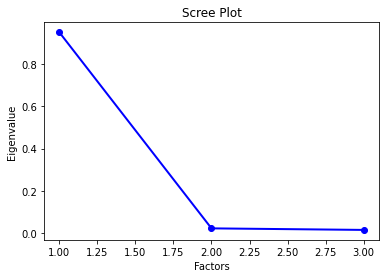

In [1375]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

From the scree plot above, the ideal number of components to use is 2. 

In [1376]:
print(pca.explained_variance_ratio_)

[0.94852394 0.02357951 0.01625643]


When using 3 factors, the first factor explains 94.8% of the total variation
Te second factor explains 2.3% while the third explains 1.6% of the total variation.

## 7. Implementing the Solution

In [1379]:
# Implementing the Solution
# Taking the data of only those with bank accounts
bankaccount_dataset = EastAfrica_dataset_clean_new[EastAfrica_dataset_clean_new.Has_a_Bank_account == 'Yes']
bankaccount_dataset.head()

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [1382]:
#Countries with people having most bank accounts
countries_bankaccount = bankaccount_dataset.country.value_counts()
countries_bankaccount

Kenya       1520
Rwanda       997
Tanzania     599
Uganda       181
Name: country, dtype: int64

Kenya is the country with the highest number of people with bank accounts, with Uganda being the least.

In [1383]:
#Type of location where people are likely to have bank accounts
location_bankaccount = bankaccount_dataset.Type_of_Location.value_counts()
location_bankaccount

Rural    1663
Urban    1634
Name: Type_of_Location, dtype: int64

Overrall, most people found in the rural areas have bank accounts which is due to the high population of people who live in the rural areas as compared in town, which also records a  large number.

In [1384]:
#Looking at the cellphone access
cellphone_bankaccount = bankaccount_dataset.Cell_Phone_Access.value_counts()
cellphone_bankaccount

Yes    3193
No      104
Name: Cell_Phone_Access, dtype: int64

People who have cellphones or access to cellphones, are the majority with bank accounts

In [1387]:
#Looking at the gender
gender_bankaccount = bankaccount_dataset.gender_of_respondent.value_counts()
gender_bankaccount

Male      1817
Female    1480
Name: gender_of_respondent, dtype: int64

Male respondents recorded to have the highest with bank accounts compared to female respondents.

In [1389]:
#Looking at the relationship
relationship_bankaccount = bankaccount_dataset.Relationship_with_head.value_counts()
relationship_bankaccount

Head of Household      2259
Spouse                  695
Child                   193
Other relative           65
Parent                   65
Other non-relatives      20
Name: Relationship_with_head, dtype: int64

Head of households are the ones who were highest with non relatives in the households being lowest.

In [1390]:
#Looking at the relationship
marital_bankaccount = bankaccount_dataset.marital_status.value_counts()
marital_bankaccount

Married/Living together    1861
Single/Never Married        959
Widowed                     243
Divorced/Seperated          232
Dont know                     2
Name: marital_status, dtype: int64

Married people are the ones with the highest number of bank accounts.

In [1391]:
#Looking at the relationship
Educuation_bankaccount = bankaccount_dataset.Level_of_Educuation.value_counts()
Educuation_bankaccount

Primary education                  1083
Secondary education                 981
Tertiary education                  590
Vocational/Specialised training     456
No formal education                 176
Other/Dont know/RTA                   6
6                                     5
Name: Level_of_Educuation, dtype: int64

People who have completed the primary school level are the ones who recorded highest number of having bank accounts.

In [1392]:
#Looking at the relationship
Job_bankaccount = bankaccount_dataset.Type_of_Job.value_counts()
Job_bankaccount

Self employed                   844
Farming and Fishing             634
Formally employed Private       567
Informally employed             440
Formally employed Government    299
Remittance Dependent            240
Other Income                    196
Government Dependent             50
Dont Know/Refuse to answer       14
No Income                        13
Name: Type_of_Job, dtype: int64

Self employed people are the ones who recorded the highest numbers of having bank accounts.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 


In this case, I would consider looking at the income of use of the bank accounts.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

We could have added the income of the respondents and the main use of the bank accounts.

### c). Did we have the right question?

Yes